# Customer purchases history

In this Project, we are going to work on **'Customer purchases history'** dataset provided by Kaggle

Dataset description: This dataset contains historical records for customer purchases from a supermarket X. The objective is to find the association rules to help supermarket owners find new marketing plans to improve their sales.

🚧 Each row corresponds to one purchase


toy_dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

### Instructions

1. Run the apriori algorithm on the provided toy_dataset. Interpret the results.
2. Try to explore the checkpoint dataset using Pandas and Plotly.
3. Run the apriori algorithm on checkpoint dataset. Interpret the results and suggest a clear business plan to the supermarket owners based on your findings.

In [1]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [5]:
toy_dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

  ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

df = pd.DataFrame(toy_dataset)
df

,0,1,2,3,4,5,6
0,Skirt,Sneakers,Scarf,Pants,Hat,None,None
1,Sunglasses,Skirt,Sneakers,Pants,Hat,None,None
2,Dress,Sandals,Scarf,Pants,Heels,None,None
3,Dress,Necklace,Earrings,Scarf,Hat,Heels,Hat
4,Earrings,Skirt,Skirt,Scarf,Shirt,Pants,None


In [7]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(toy_dataset).transform(toy_dataset)

# Display the output
te_data

array([[False, False,  True, False, False,  True, False,  True, False,
         True,  True, False],
       [False, False,  True, False, False,  True, False, False, False,
         True,  True,  True],
       [ True, False, False,  True, False,  True,  True,  True, False,
        False, False, False],
       [ True,  True,  True,  True,  True, False, False,  True, False,
        False, False, False],
       [False,  True, False, False, False,  True, False,  True,  True,
         True, False, False]])

In [9]:
# Convert to DataFrame
onehot_df = pd.DataFrame(te_data, columns=te.columns_)

onehot_df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [11]:
# We'll set a `min_support` value to control the threshold of how frequent an itemset must be to be considered.

frequent_itemsets = apriori(onehot_df, min_support=0.2, use_colnames=True)
# 'min_support=0.2' means that we are only interested in itemsets that appear in at least 20% of the transactions.

frequent_itemsets

,support,itemsets
0,0.4,(Dress)
1,0.4,(Earrings)
2,0.6,(Hat)
3,0.4,(Heels)
4,0.2,(Necklace)
...,...,...
146,0.2,"(Hat, Heels, Scarf, Earrings, Necklace)"
147,0.2,"(Skirt, Pants, Shirt, Scarf, Earrings)"
148,0.2,"(Sneakers, Skirt, Pants, Hat, Scarf)"
149,0.2,"(Skirt, Pants, Hat, Sunglasses, Sneakers)"


In [13]:
# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
# We use 'lift' as the metric to determine how much more likely two items are to be purchased together compared to random chance.
# We use 'min_threshold' to filter the rules to only include those with a lift greater than 1.

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Earrings),(Dress),0.4,0.4,0.2,0.50,1.25,0.04,1.200000,0.333333
1,(Dress),(Earrings),0.4,0.4,0.2,0.50,1.25,0.04,1.200000,0.333333
2,(Heels),(Dress),0.4,0.4,0.4,1.00,2.50,0.24,inf,1.000000
3,(Dress),(Heels),0.4,0.4,0.4,1.00,2.50,0.24,inf,1.000000
4,(Dress),(Necklace),0.4,0.2,0.2,0.50,2.50,0.12,1.600000,1.000000
...,...,...,...,...,...,...,...,...,...,...
1135,(Heels),"(Hat, Dress, Scarf, Earrings, Necklace)",0.4,0.2,0.2,0.50,2.50,0.12,1.600000,1.000000
1136,(Dress),"(Earrings, Hat, Scarf, Heels, Necklace)",0.4,0.2,0.2,0.50,2.50,0.12,1.600000,1.000000
1137,(Scarf),"(Earrings, Hat, Dress, Heels, Necklace)",0.8,0.2,0.2,0.25,1.25,0.04,1.066667,1.000000
1138,(Earrings),"(Hat, Dress, Scarf, Heels, Necklace)",0.4,0.2,0.2,0.50,2.50,0.12,1.600000,1.000000


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


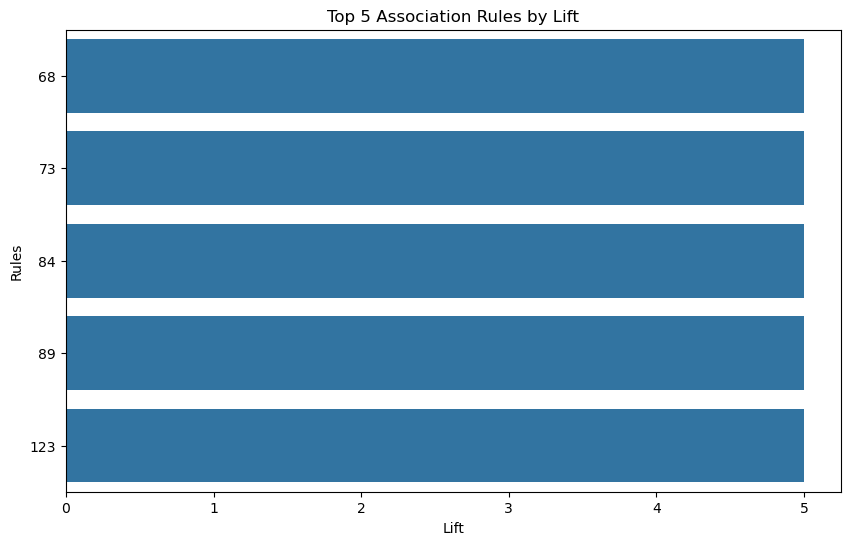

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the rules by lift and select the top 5
top_rules = rules.nlargest(5, 'lift')

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y=top_rules.index.astype(str), data=top_rules)
plt.title('Top 5 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.show()

## Market basket optimisation

In [18]:
# Load the dataset manually

with open("Market_Basket_Optimisation.csv", 'r') as file:
    
    # Read the file line by line, strip any leading/trailing whitespace, 
    # and split each line by commas to create a list of items (i.e., a transaction)
    data = [line.strip().split(',') for line in file]

# Display the first five transactions (each transaction is a list of items)
for transaction in data[:5]:
    print(transaction)

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']
['burgers', 'meatballs', 'eggs']
['chutney']
['turkey', 'avocado']
['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']


In [20]:
# Create a one-hot encoded DataFrame for the items
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(data).transform(data)

df = pd.DataFrame(te_data, columns=te.columns_)

df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# Set a minimum support value to find frequent itemsets that appear in at least 1% of transactions
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Display the frequent itemsets found
frequent_itemsets.head()

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)


In [24]:
# Now we will use the frequent itemsets to generate association rules.
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the first few association rules
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,0.003654,1.016113,0.413630
1,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147,0.325896
2,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,0.004398,1.063198,0.417434
3,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,0.004398,1.058080,0.420238
4,(chocolate),(burgers),0.163845,0.087188,0.017064,0.104150,1.194537,0.002779,1.018933,0.194767


In [26]:
# We can filter the rules to focus on those with high confidence or lift values.
strong_rules = rules[(rules['lift'] > 1.2) & (rules['confidence'] > 0.5)]

# Sort the rules by lift, in descending order
strong_rules = strong_rules.sort_values(by='lift', ascending=False)

# Display the filtered rules
strong_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
343,"(ground beef, eggs)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,0.540342
377,"(ground beef, milk)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,0.537969


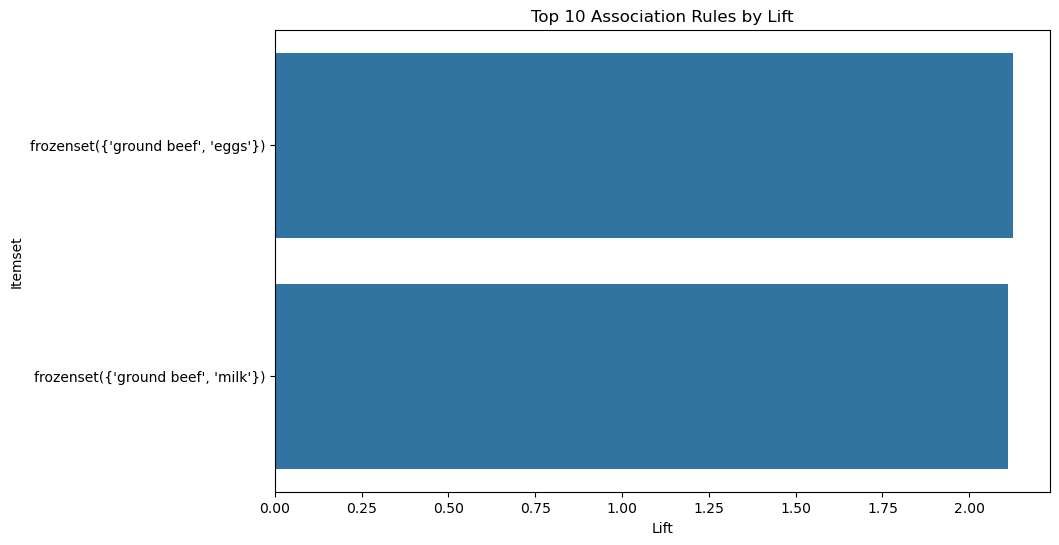

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the top 10 rules based on lift
plt.figure(figsize=(10, 6))
sns.barplot(x=strong_rules['lift'].head(10), y=strong_rules['antecedents'].head(10).astype(str))
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Itemset')
plt.show()